# Logistic Regression
___
by: __Oskar Edén Wallberg__

Implements logistic regression with MLE and gradient descent. 

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from models.LogReg import LogisticRegression

print(f'np=={np.__version__}')
print(f'pd=={pd.__version__}')
print(f'sns=={sns.__version__}')

np==1.26.0
pd==2.1.1
sns==0.13.0


### Data Generation
___
* With noise and overlap

In [361]:
m = 100

x0 = np.random.normal(loc=2, scale=0.7, size=(m//2, 1))
x1 = np.random.normal(loc=4, scale=0.7, size=(m//2, 1))
X = np.vstack((x0, x1))

X += np.random.normal(0, 0.2, (m, 1))

X.shape

(100, 1)

In [362]:
y0 = np.zeros(shape=(m//2, 1))
y1 = np.ones(shape=(m//2, 1))
y = np.vstack((y0, y1))

y.shape

(100, 1)

### Data Visualization
___

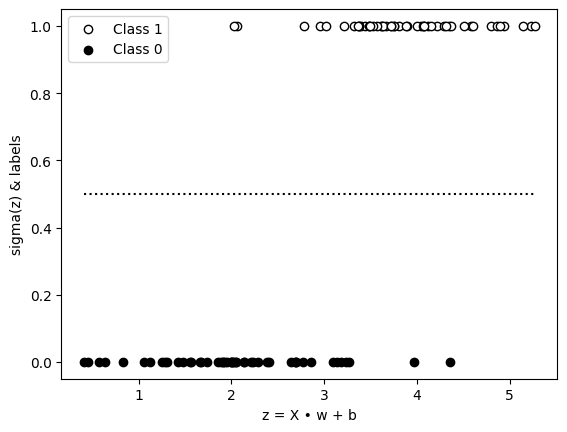

In [363]:
plt.scatter(X[y==1], y[y==1], c='w', edgecolors='k', label='Class 1')
plt.scatter(X[y==0], y[y==0], c='k', edgecolors='k', label='Class 0')
plt.plot([np.min(X), np.max(X)], [0.5, 0.5], ls=':', c='k', label='')

plt.xlabel('z = X • w + b')
plt.ylabel('sigma(z) & labels')
plt.legend()
plt.show()

### Scale X Data
___
* Standardize
* Not needed for y

In [364]:
X_st = (X-np.mean(X))/np.std(X)

X_st.shape

(100, 1)

### Create Logistic Regression Model
___
* fit 
* predict

In [365]:
logreg = LogisticRegression()

logreg.fit(X=X_st, y=y.ravel())

y_pred = logreg.predict(X=X_st)

y_pred.shape

(100,)

In [366]:
idx_sorted = np.argsort(X.ravel())

X = X[idx_sorted]
y = y[idx_sorted]
y_pred = y_pred[idx_sorted]

X.shape, y.shape, y_pred.shape

((100, 1), (100, 1), (100,))

//NOTE sort X-values in ascending order for smooth sigmoid curve graph

### Prediction Analysis
___
* Plot curve
* Write NLL as measure of loss

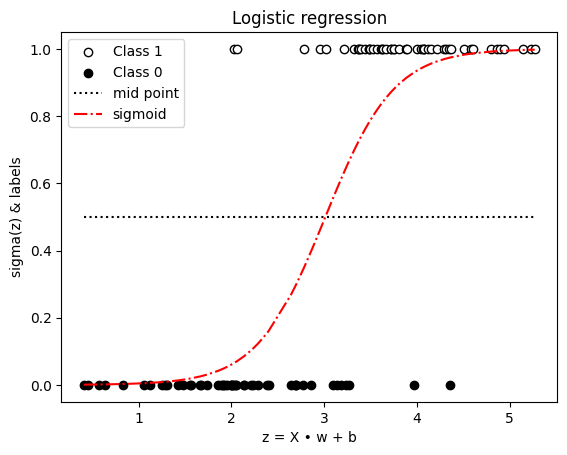

In [367]:
plt.scatter(X[y==1], y[y==1], c='w', edgecolors='k', label='Class 1')
plt.scatter(X[y==0], y[y==0], c='k', edgecolors='k', label='Class 0')
plt.plot([np.min(X), np.max(X)], [0.5, 0.5], ls=':', c='k', label='mid point')
plt.plot(X, y_pred, ls='-.', c='r', label='sigmoid')

plt.title('Logistic regression')
plt.xlabel('z = X • w + b')
plt.ylabel('sigma(z) & labels')
plt.legend()
plt.show()

In [368]:
def negative_log_likelihood(labels, y_pred):
    '''negative log-likelihood loss function'''
    nll = 0
    m = len(labels)
    for i in range(m):
        p_i = y_pred[i]
        y_i = labels[i]
        nll += y_i * np.log(p_i) + (1-y_i) * np.log(1-p_i)
    return -1/m * nll

nll = negative_log_likelihood(labels=y.ravel(), y_pred=y_pred.ravel())
print(f'NLL: {np.round(nll, decimals=3)}')

NLL: 0.288
